# Looking at Data
(Jason)

In [1]:
def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces = measure.marching_cubes_classic(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [2]:
ls -l ..

total 4
-rw-r--r--  1 root root  94 Mar  1 19:48 README.md
drwxr-xr-x  6 root root 204 Apr  2 21:06 data/
drwxr-xr-x  4 root root 136 Apr  2 20:53 mil/
drwxr-xr-x  2 root root  68 Mar  1 19:48 notebooks/
drwxr-xr-x 10 root root 340 Mar  4 17:36 papers/
drwxr-xr-x 20 root root 680 Apr  1 02:06 proposal/
drwxr-xr-x 12 root root 408 Apr  2 21:23 sample_kernals/


In [3]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
% matplotlib inline
# Some constants 
INPUT_FOLDER = '../data/3Darrays_stage1/'
patients = os.listdir(INPUT_FOLDER)
patients.sort()

In [4]:
ls -l ../data

total 48
drwxr-xr-x 1597 root root 54298 Apr  1 05:25 3Darrays_stage1/
drwx------   22 root root   748 Apr  1 02:03 sample_images/
drwxr-xr-x    3 root root   102 Apr  2 20:47 stage1/
-rw-r--r--    1 root root 48905 Jan 11 23:39 stage1_labels.csv


In [5]:
lung_files = [os.path.splitext(f)[0] for f in os.listdir(INPUT_FOLDER)]
print lung_files[:10]

def lung_to_path(lung_id):
    return INPUT_FOLDER + lung_id + ".npy"
def load_lung(lung_id):
    return np.load(lung_to_path(lung_id))
def get_random_lung():
    random_lung_id = np.random.choice(lung_files, 1)[0]
    return load_lung(random_lung_id)

['0015ceb851d7251b8f399e39779d1e7d', '0030a160d58723ff36d73f41b170ec21', '003f41c78e6acfa92430a057ac0b306e', '006b96310a37b36cccb2ab48d10b49a3', '008464bb8521d09a42985dd8add3d0d2', '0092c13f9e00a3717fdc940641f00015', '00986bebc45e12038ef0ce3e9962b51a', '00cba091fa4ad62cc3200a657aeb957e', '00edff4f51a893d80dae2d42a7f45ad1', '0121c2845f2b7df060945b072b2515d7']


In [6]:
random_lung = get_random_lung()
plt.imshow(a[30,:,:], cmap=plt.cm.gray)
plt.show()
print (a.shape)

NameError: name 'a' is not defined

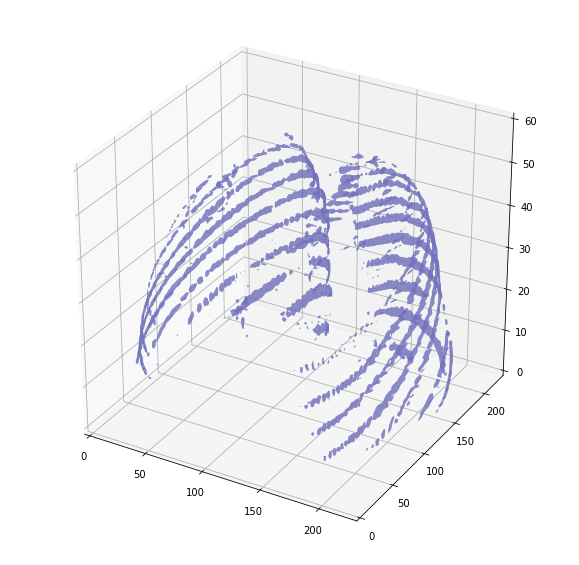

In [7]:
plot_3d(random_lung, 400)

In [13]:
dicom_shapes = [load_lung(f).shape for f in lung_files]

In [16]:
dicom_shapes = np.array(dicom_shapes)

In [24]:
print dicom_shapes.shape
print dicom_shapes[0]
zs = dicom_shapes[:,0]
print np.sum(zs == 60) - zs.size

(1595, 3)
[ 60 227 227]
0
